### Package dependency

In [1]:
import torch
"""
    from torch import save, load, nn
    from torch.optim import Adam
    from torch.utils.data import DataLoader 
"""
import torchvision
from torchvision.transforms import ToTensor 

# from tqdm import tqdm

### Loading mnist dataset

In [2]:
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

In [3]:
len(mnist_trainset), len(mnist_testset)

(60000, 10000)

In [4]:
mnist_trainset.data.size(), mnist_trainset.data.size()

(torch.Size([60000, 28, 28]), torch.Size([60000, 28, 28]))

In [5]:
type(mnist_trainset)

torchvision.datasets.mnist.MNIST

### Visualize Mnist

Feature batch shape: 60000
Labels batch shape: 60000


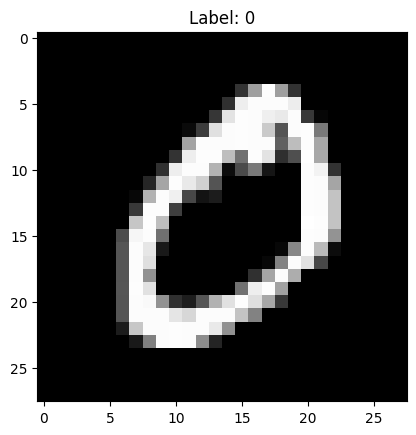

In [8]:
# Visualize data
import matplotlib.pyplot as plt

INDEX = 1

# Display image and label.
train_features, train_labels = mnist_trainset.data, mnist_trainset.targets

print(f"Feature batch shape: {train_features.size()[0]}")
print(f"Labels batch shape: {train_labels.size()[0]}")

img = train_features[INDEX].squeeze()
label = train_labels[INDEX] 
plt.title(f'Label: {label}') # label: torch.Tensor
plt.imshow(img, cmap="gray")
plt.show()

### Building Neural Network

In [7]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,10),
            nn.Softmax()
        )
    
    def forward(self, x):
        return self.network(x)

In [8]:
print(Model())

Model(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Softmax(dim=None)
  )
)


### Train and test Model

For tensorflow, you just need to do **model.fit** && **model.compile** and it's done.

But in Pytorch, you need Dataloader to train your model.

In [20]:
"""
def train(model : torch.nn.Module, dataset_train : torchvision.datasets.MNIST, 
          loss_fn : torch.nn, optimizer : torch.optim,
          EPOCH, BATCHSIZE):
"""

def train(model, dataset_train, loss_fn, optimizer, EPOCH, BATCHSIZE):
    # transfer package from "torchvision.dataset" into "torch.utils.data.Dataloader"
    train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=BATCHSIZE, num_workers=1)
    
    # Take into training phase
    model.train()
    
    # Starting training
    for i in range(EPOCH):
        for batch_idx, (imgs, labels) in enumerate(train_loader):
            # Set cuda
            #if torch.cuda.is_available():
            #    imgs = imgs.cuda()
            #    labels = labels.cuda()
            
            # Get gradient from loss function(loss_fn)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            
            # Update gradient from loss(loss)
            optimizer.zero_grad() # zero out exist gradient
            loss.backward() # to backpropagate gradients of prediction loss.
            optimizer.step()  # apply Gradient decent: to adjust model parameters.  
            
            # Print message
            if(batch_idx+1)%1000 == 0: 
                print(f"Training Epoch: {i} [{batch_idx*len(imgs)}/{len(train_loader.dataset)}({round((batch_idx*len(imgs)/len(train_loader.dataset) * 100.))}%)]     Loss: {loss.item()}")


In [18]:
def test(model, mnist_testset, loss_fuc, BATCHSIZE):
    # transfer package from "torchvision.dataset" into "torch.utils.data.Dataloader"
    test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=BATCHSIZE, num_workers=1)
    
    # Set model to evaluation/testing phase
    model.eval()
    
    # Accuracy and Test_Loss
    Total_accurate  = 0
    Total_sample = 0
    Test_Loss = []
    
    # Testing
    with torch.no_grad():
        for datas in test_loader:
            # Load data into imgs, labels
            # Notice that imgs and labels are 'array'w
            imgs, labels = datas
            
            # Prediction: Loss
            output = model(imgs)
            loss = loss_fuc(output, labels)
            
            # Add Loss into Test_Loss(array)
            Test_Loss.append(loss)
            print(f"Loss: {loss}")
            
            # Prediction: counting Accuracy
            # Using: output && labels
            output = torch.max(output, 1)[1]
            Total_accurate += (output == labels).sum().item()
            Total_sample += len(output)
            
    # Print Test Loss
    [print("=", end='') for _ in range(1, 10)]
    print(f"\nThe average loss is: {sum(Test_Loss) / len(Test_Loss)}")  
    print(f"The final loss is: {Test_Loss[len(Test_Loss)-1]}")  

    # Print Accuracy 
    print(f"The final accuracy is: {Total_accurate/Total_sample * 100}%")

Hyperparamter setting

In [11]:
learning_rate = 0.001
epoch = 2
batch_size = 4

In [12]:
model = Model()

# Loss function (eg: nn.CrossEntropyLoss, nn.L1Loss, nn.MSELoss)
loss_function = nn.CrossEntropyLoss()

# Optimizer (it's all in torch.optim)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

**mnist_trainset**, previously appear in "loadings mnist data"

In [21]:
train(model, mnist_trainset, loss_function, optimizer, epoch, batch_size)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [19]:
test(model, mnist_testset, loss_function, batch_size)

Loss: 1.4612964391708374
Loss: 1.4624863862991333
Loss: 1.7121855020523071
Loss: 1.4625022411346436
Loss: 1.4627732038497925
Loss: 1.4668546915054321
Loss: 1.4634989500045776
Loss: 1.461591362953186
Loss: 1.6719794273376465
Loss: 1.5945279598236084
Loss: 1.4704513549804688
Loss: 1.4775400161743164
Loss: 1.4619903564453125
Loss: 1.4643583297729492
Loss: 1.4793652296066284
Loss: 1.5773952007293701
Loss: 1.5823439359664917
Loss: 1.4611525535583496
Loss: 1.4720144271850586
Loss: 1.4951889514923096
Loss: 1.5416643619537354
Loss: 1.513486623764038
Loss: 1.4611716270446777
Loss: 1.5276825428009033
Loss: 1.46234130859375
Loss: 1.4612174034118652
Loss: 1.4659587144851685
Loss: 1.6510435342788696
Loss: 1.4779996871948242
Loss: 1.6590452194213867
Loss: 1.5143799781799316
Loss: 1.725819706916809
Loss: 1.4616062641143799
Loss: 1.4632844924926758
Loss: 1.5589317083358765
Loss: 1.4615267515182495
Loss: 1.5997447967529297
Loss: 1.9325664043426514
Loss: 1.471205234527588
Loss: 1.499415636062622
Loss: 1

### Save Model

In [ ]:
torch.save(model, 'model.pth')

### Load Model and predict (0~9)

In [ ]:
model = torch.load('model.pth')

### Reference

Reference:
- [How to use Jupyter notebooks in a conda environment?](https://stackoverflow.com/questions/58068818/how-to-use-jupyter-notebooks-in-a-conda-environment)

- [What is the difference between .data.size() and .size() in PyTorch?](https://stackoverflow.com/questions/68275587/what-is-the-difference-between-data-size-and-size-in-pytorch)

- [Pytorch：torch.flatten()与torch.nn.Flatten()](https://blog.csdn.net/Super_user_and_woner/article/details/120782656)

- [Pytorch中dataloader之enumerate与iter，tqdm](https://blog.csdn.net/jzwong/article/details/103777338)

- [【深度学习】LeNet网络架构](https://blog.csdn.net/qq_43466788/article/details/133121184?spm=1001.2101.3001.6650.17&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBLOGTAG%7Edefault-17-133121184-blog-130553358.235%5Ev38%5Epc_relevant_anti_vip_base&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBLOGTAG%7Edefault-17-133121184-blog-130553358.235%5Ev38%5Epc_relevant_anti_vip_base&utm_relevant_index=23)